In [1]:
import codecs, difflib, distance
import jellyfish
import fuzzywuzzy
from fuzzywuzzy import fuzz
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.spatial import distance

lemm = WordNetLemmatizer()

C:\Users\santhosh\AppData\Local\Continuum\Anaconda2\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [1]:
#Text similarity is to compute how 'close' two pieces of text are in (1) meaning or (2) surface closeness. 
#The first is referred to as semantic similarity and the latter is referred to as lexical similarity.

In [ ]:
## Lexical Similarity - Word to Word Matching
## It looks at word level match and not meaning

## Example :
##  Statement 1: Cat ate mouse
##  Statement 2: Mouse ate Cat

## Any Text Similarity Algorithm will give a HIGH Score of similarity
## Statement 1 and Statement 2 are both similar in Words but not in the meaning 

In [78]:
statement1 = 'Cat ate mouse'
statement2 = 'Mouse ate cat'

### Getting the lemmatization for words in the  statements
Wlist = []
for word in word_tokenize(statement1):
    Wlist.append(lemm.lemmatize(word.lower(),'v'))    
statement1 = ' '.join(Wlist)    

Wlist = []
for word in word_tokenize(statement2):
    Wlist.append(lemm.lemmatize(word.lower(),'v'))

statement2 = ' '.join(Wlist)    

setlist =list(set(word_tokenize(statement1) + word_tokenize(statement2)))

## Creating 1 or 0's
List1 = []
List2 = []

for item in setlist:
    if item in statement1:
        List1.append(1)
    else:
        List1.append(0)
            
for item in setlist:
    if item in statement2:
        List2.append(1)
    else:
        List2.append(0)

            
print 1 - distance.cosine(List1,List2)

1.0


In [ ]:
## Semantic Similarity - Meaning between is used for measuring similarity
## Extracting Semantic similarity is difficult

## Example:
##  Statement 1: Cat ate mouse
##  Statement 2: Mouse ate Cat

## From Semantic wise Both are different. 
## The Normal Text Similarity Algorithm will able to perform semantic similarity to an extent by using N- Non determiner words

In [ ]:
### People use Syntactic Parsing for Semantic Similarity
###  Identifying the noun and object in both the statements

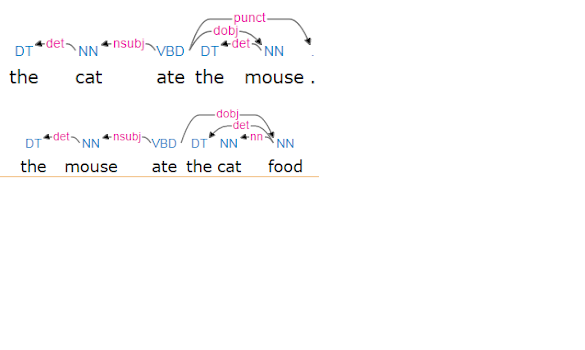

In [50]:
from IPython.display import Image
Image("D:\\CoE\\Text Analytics\\Text Summarization\\summarization.png")

In [ ]:
## Text Similarity Algorithms
# Fuzzy Wuzzy
# Manhattan Distance
# Hamming Distance
# Jaro Distance
# Jaro - Wrinkler Distance

# SequenceMatcher (Difflib)
# Jaccard Similarity
# Cosine Similarity
# Word Embeddings

In [148]:
#i)   Number of common words in both texts (words should be stemmed)
#ii)  Number of words in each sentence
#iii) Cosine similarity on TF-IDF vectors (unigrams, word n-grams, character n-grams
#iv)  Glove similarity (you can try the pretrained vectors from wikipedia)
#v)   Longest common subsequence (LCS)

In [160]:
### Fuzzy Wuzzy

## Fuzzy with Ratio
## Fuzzy with Partial Ratio
## Fuzzy with Token Sort Ratio
## Fuzzy with Token Set Ratio
## Fuzzy with WRatio

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

s1 = "I love GeeksforGeeks"
s2 = "I am hate loving GeeksforGeeks"
print "FuzzyWuzzy Ratio: ", fuzz.ratio(s1, s2)
print "FuzzyWuzzy PartialRatio: ", fuzz.partial_ratio(s1, s2)
print "FuzzyWuzzy TokenSortRatio: ", fuzz.token_sort_ratio(s1, s2)
print "FuzzyWuzzy TokenSetRatio: ", fuzz.token_set_ratio(s1, s2)
print "FuzzyWuzzy WRatio: ", fuzz.WRatio(s1, s2)


###  Applications of Fuzzy Wuzzy
#1. Spelling Correction
#2. Identifying names with multiple ways

FuzzyWuzzy Ratio:  76
FuzzyWuzzy PartialRatio:  85
FuzzyWuzzy TokenSortRatio:  76
FuzzyWuzzy TokenSetRatio:  86
FuzzyWuzzy WRatio:  86


In [84]:
## Minkowsi Distance
print 1- distance.minkowski(List1,List2)

### Hamming Distance
#  Hamming Distance is used to measure the distance between two strings of same length
# It is measured by the number of editing operations required to get the required string
## Hamming Distance
print 1- distance.hamming(List1,List2)

## Euclidean Distance
## sqrt {(x1-y1)^2 + (x2-y2)^2}
print 1- distance.euclidean(List1,List2)

1.0
1.0
1.0


In [85]:
from math import*

def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))

In [86]:
print manhattan_distance(List1,List2)

0


In [87]:
from difflib import SequenceMatcher

###The builtin SequenceMatcher is very slow on large input

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [88]:
similar("Apples are bad","Apples are not good")

0.7272727272727273

In [165]:
## Jaccard Similarity
statement1= 'I am insane'
statement2= 'I am not insane'

In [162]:
## Jaccard Similarity = Length of intersection words / Length of union of words 
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

## Length of intersection:3
## Length of Union: (16-3)

### To get the better similarity score,
## Try removing the stopwords
## Try Removing the Punctuations
## Lemmatize or Stem the words to its root words

In [163]:
print get_jaccard_sim(Sentence1,Sentence2)

0.75


In [ ]:
## Disadvantages of Jaccard Similairty
## It does not take care of friend word occuring more than once in the same statement

In [109]:
## Cosine Similarity
## It is calculated by the angle between two list or strings
## If the angle is 0 means bith the statements are same
## If the angle is 90 means bith the statements are not same

In [166]:
### Getting the lemmatization for words in the  statements
Wlist = []
for word in word_tokenize(statement1):
    Wlist.append(lemm.lemmatize(word.lower(),'v'))    
statement1 = ' '.join(Wlist)    

Wlist = []
for word in word_tokenize(statement2):
    Wlist.append(lemm.lemmatize(word.lower(),'v'))

statement2 = ' '.join(Wlist)    

setlist =list(set(word_tokenize(statement1) + word_tokenize(statement2)))

## Creating 1 or 0's
List1 = []
List2 = []

for item in setlist:
    if item in statement1:
        List1.append(1)
    else:
        List1.append(0)
            
for item in setlist:
    if item in statement2:
        List2.append(1)
    else:
        List2.append(0)

            
print 1 - distance.cosine(List1,List2)

0.866025403784


In [111]:
print 1-distance.cosine(List1,List2)

1.0


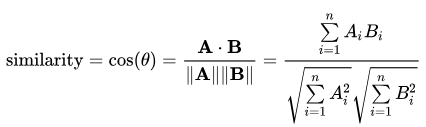

In [112]:
Image("D:\\CoE\\Text Analytics\\Text Summarization\\class2.png")

Step 1: Get the Term Frequency


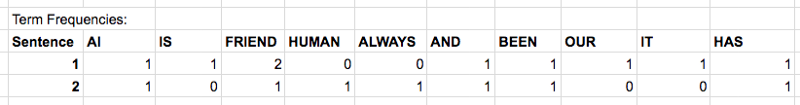

In [117]:
print 'Step 1: Get the Term Frequency'
Image("D:\\CoE\\Text Analytics\\Text Summarization\\class3.png")

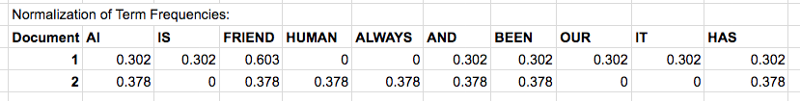

In [116]:
print 'Step 2: Normalize the vectors'
Image("D:\\CoE\\Text Analytics\\Text Summarization\\class4.png")

In [118]:
print 'Step 3: Multiply the values of each word across the statement, to get the final score'

Step 3: Multiply the values of each word across the statement, to get the final score


In [113]:
##Differences between Jaccard Similarity and Cosine Similarity:
##1. Jaccard similarity takes only unique set of words for each sentence / document while cosine similarity takes total length of the vectors. (these vectors could be made from bag of words term frequency or tf-idf)
##2. This means that if you repeat the word “friend” in Sentence 1 several times, cosine similarity changes but Jaccard similarity does not. For ex, if the word “friend” is repeated in the first sentence 50 times, cosine similarity drops to 0.4 but Jaccard similarity remains at 0.5.
##3. Jaccard similarity is good for cases where duplication does not matter, cosine similarity is good for cases where duplication matters while analyzing text similarity. For two product descriptions, it will be better to use Jaccard similarity as repetition of a word does not reduce their similarity.

In [ ]:
## Cosine similarity is for comparing two real-valued vectors, but Jaccard similarity is for comparing two binary vectors (sets).
## Simply put; in cosine similarity, the number of common attributes is divided by the total number of possible attributes. Whereas in Jaccard Similarity, the number of common attributes is divided by the number of attributes that exist in at least one of the two objects.

In [ ]:
### In the previous method Term Frequency is used, Instead of term frequency or count vectorizer one can use TF-IDF Vectorizer

In [119]:
### Finding the Similarity Between Documents
d1 = "plot: two teen couples go to a church party, drink and then drive."
d2 = "films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . "
d3 = "every now and then a movie comes along from a suspect studio , with every indication that it will be a stinker , and to everybody's surprise ( perhaps even the studio ) the film becomes a critical darling . "
d4 = "damn that y2k bug . "
documents = [d1, d2, d3, d4]

In [146]:
import nltk, string, numpy
stemmer = nltk.stem.porter.PorterStemmer()

def StemNormalize(text):
 return StemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

def StemTokens(tokens):
 return [stemmer.stem(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemTokens(tokens):
 return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
 return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

lemmer = nltk.stem.WordNetLemmatizer()

In [129]:
### Using TF-IDF Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
LemVectorizer = CountVectorizer(tokenizer=LemNormalize, stop_words='english')
LemVectorizer.fit_transform(documents)

<4x41 sparse matrix of type '<type 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [130]:
print LemVectorizer.vocabulary_

{u'spawn': 29, u'crowd': 11, u'casper': 5, u'church': 6, u'hell': 20, u'comic': 8, u'superheroes': 33, u'superman': 34, u'plot': 27, u'movie': 24, u'book': 3, u'suspect': 36, u'film': 17, u'party': 25, u'darling': 13, u'really': 28, u'teen': 37, u'everybodys': 16, u'damn': 12, u'batman': 2, u'couple': 9, u'drink': 14, u'like': 23, u'geared': 18, u'studio': 31, u'plenty': 26, u'surprise': 35, u'world': 39, u'come': 7, u'bug': 4, u'kid': 22, u'ghost': 19, u'arthouse': 1, u'y2k': 40, u'stinker': 30, u'success': 32, u'drive': 15, u'theyre': 38, u'indication': 21, u'critical': 10, u'adapted': 0}


In [131]:
tf_matrix = LemVectorizer.transform(documents).toarray()
print tf_matrix

[[0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
  1 0 0 0]
 [1 1 1 2 0 1 0 0 2 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0
  0 1 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 2 0 0 0 1 1
  0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1]]


In [140]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfTran = TfidfTransformer(norm="l2")
tfidfTran.fit(tf_matrix)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [141]:
import math
def idf(n,df):
    result = math.log((n+1.0)/(df+1.0)) + 1
    return result

In [142]:
tfidf_matrix = tfidfTran.transform(tf_matrix)
cos_similarity_matrix = (tfidf_matrix * tfidf_matrix.T).toarray()
print cos_similarity_matrix

[[ 1.          0.          0.          0.        ]
 [ 0.          1.          0.03264186  0.        ]
 [ 0.          0.03264186  1.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [143]:
### Using TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')

In [144]:
def cos_similarity(textlist):
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()
cos_similarity(documents)

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.03264186,  0.        ],
       [ 0.        ,  0.03264186,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [167]:
## Word2Vec
import gensim
import nltk
from gensim import corpora,models,similarities
import pandas as pd
import multiprocessing

jokes = pd.read_csv('D:\\CoE\\Text Analytics\\Word2Vec\\jokes.csv')

df_x = jokes.Question.values.tolist()
df_y = jokes.Answer.values.tolist()

corpuss = df_x+df_y
corp = [nltk.word_tokenize(sent.decode('utf-8'))for sent in corpuss]

model = gensim.models.Word2Vec(corp,min_count=1,size=32)

model.most_similar('food')
#num_of_workers = multiprocessing.cpu_count()

#model = gensim.models.Word2Vec(sg=1,min_count=3,seed=10,workers=num_of_workers)

[(u'country', 0.9526662826538086),
 (u'cheese', 0.9144144654273987),
 (u'number', 0.9119253158569336),
 (u'gift', 0.90790855884552),
 (u'game', 0.9057734608650208),
 (u'famous', 0.9031780958175659),
 (u'eating', 0.9007160663604736),
 (u'fruit', 0.9006643295288086),
 (u'bee', 0.8936486840248108),
 (u'robot', 0.8887476325035095)]